<a href="https://colab.research.google.com/github/DataScience-TeamProject/data/blob/main/Data_Science_Team_G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **이주노동자 근로환경 및 복지환경의 거시적 분석**🧐

Team G: 권연진, 노은재, 박정빈, 신하영, 안소은

❕
주제 선정 계기: 영화, 예능 프로그램 등 미디어에서는 이주노동자의 근로환경이 매우 열악하고 산재가 자주 일어나는 위험한 환경으로 연출해왔다. 이러한 콘텐츠에 지속적으로 노출되어 온 팀원들은 이주노동자의 근로환경과 처우가 열악할 것이라는 고정관념을 가지고 있었다. 외국인을 직접 마주한 경험과 이주노동자에 대한 각자의 생각을 공유하는 과정에서 **'과연 우리나라는 이주노동자가 근로하기에 만족스러운 환경을 제공하는지'** 에 대한 궁금증이 들었다. 이주노동자의 전반적인 근로 환경을 살펴봄으로써 의문점에 대해 논의하고자 해당 주제를 선정하였다.

✅
'이주 노동자'란 취업을 목적으로 본래 살던 곳을 떠나 다른 지역이나 다른 나라로 일하러 가는 노동자를 말한다. **우리나라에서는 취업 자격으로 체류하는 외국인 중에서도 단순기능에 종사하는 외국인을 이주 노동자라고 한다.**
(중략) 외국인 노동자라고도 불리나 차별적 요소가 내포되어 있으므로 이주 노동자라는 명칭이 바람직하다.’라고 명시되어 있다. (출처: 네이버 지식백과)
 

위 내용에 근거하여 이번 프로젝트에서는**‘단순노무 취업비자’에 해당하는 비자를 소지한 외국인을 이주노동자로** 가정하였다. 다만 사회 통념상 외국인노동자로 지칭하는 경우가 많기 때문에 크롤링 및 워드클라우딩 과정에서는 키워드로 '외국인노동자'를 사용하였다.


# **공통 라이브러리 및 모듈 불러오기**

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,066 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [3]:
#한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# **Ⅰ 연도별 체류 외국인 현황**

**1) 데이터 전처리**

In [ ]:
#csv 파일 불러오기
foreigner = pd.read_csv('연도별 외국인 체류 현황.csv', encoding='cp949')
foreigner.head()

,국적(지역)별(1),성별(1),2016,2016.1,2016.2,2016.3,2016.4,2016.5,2016.6,2016.7,...,2020.28,2020.29,2020.30,2020.31,2020.32,2020.33,2020.34,2020.35,2020.36,2020.37
0,국적(지역)별(1),성별(1),합계,외교(A-1),공무(A-2),사증면제(B-1),관광통과(B-2),일시취재(C-1),단기방문(C-3),단기취업(C-4),...,거주(F-2),동반(F-3),재외동포(F-4),영주(F-5),결혼이민(F-6),기타(G-1),관광취업(H-1),방문취업(H-2),관광상륙(T-1),기타(Others)
1,총계,계,2049441,2992,2230,112323,118566,27,190443,594,...,43666,20050,466682,160947,133987,33196,874,154537,257,90654
2,총계,남자,1117206,1597,1395,56041,55209,21,101814,443,...,19354,7457,228317,74714,26042,24813,196,93196,144,63242
3,총계,여자,932235,1395,835,56282,63357,6,88629,151,...,24312,12593,238365,86233,107945,8383,678,61341,113,27412
4,총계,제3의성,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [ ]:
#각 연도별로 합계만 불러오기
data=foreigner.loc[1, ['2016','2017','2018','2019','2020']]
data

2016    2049441
2017    2180498
2018    2367607
2019    2524656
2020    2036075
Name: 1, dtype: object

In [ ]:
#값을 실수형(floaat)으로 변환
data = data.astype('float') 
data

2016    2049441.0
2017    2180498.0
2018    2367607.0
2019    2524656.0
2020    2036075.0
Name: 1, dtype: float64

**2) 시각화_막대 그래프**

In [ ]:
#그래프 크기 설정
plt.rcParams['figure.figsize'] = (8,6)

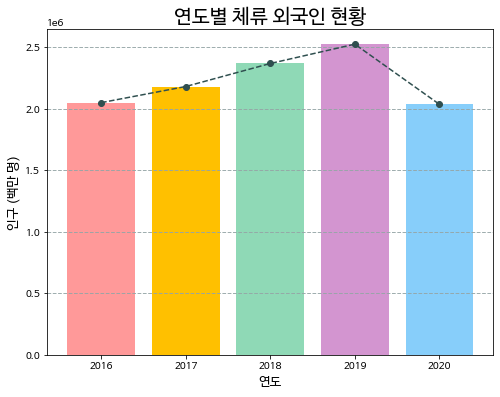

In [ ]:
#x축 라벨 설정
x= ['2016','2017','2018','2019','2020']

#막대 그래프 설정
plt.title('연도별 체류 외국인 현황', fontsize = 20)
plt.bar(x, data, color = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'lightskyblue'])
#그리드 설정
plt.grid(color='#95a5a6ed', linestyle='--', linewidth=1, axis='y', alpha=0.9)
#꺾은선 그래프 설정
plt.plot(x, data, color='darkslategray', linestyle='--', marker='o')
#label 설정
plt.xlabel('연도', size = 13)
plt.ylabel('인구 (백만 명)', size = 13)

plt.show()

*   외국인 인구가 2019년까지 증가하다가 코로나 19의 영향으로 입국이 통제되어 외국인 인구 급감


# **Ⅱ 비자 유형에 따라 구분한 외국인 체류 요인**

In [ ]:
#범례를 나타내기 위한 라이브러리
import matplotlib.patches as mpatches 
import matplotlib.lines as mlines 

**1) 데이터 전처리**

In [ ]:
#csv 파일 불러오기
for_stay = pd.read_csv('법무부_외국인체류데이터_20191231.csv', encoding='cp949')
for_stay.head()

,대륙,국적,성별,D-1(문화예술),D-2(유학),D-3(기술연수),D-4(일반연수),D-5(취재),D-6(종교),D-7(주재),...,E-10(선원취업),F-1(방문동거),F-2(거주),F-3(동반),F-5(영주),F-6(결혼이민),G-1(기타),H-1(관광취업),H-2(방문취업),기타(other)
0,아시아주,한국계중국인,남성,1.0,465.0,80.0,130.0,1.0,1.0,12.0,...,1.0,9474.0,5207.0,18.0,47026.0,6693.0,162.0,NaN,117420.0,5.0
1,아시아주,한국계중국인,여성,1.0,682.0,59.0,112.0,NaN,NaN,1.0,...,NaN,10679.0,5729.0,35.0,41833.0,10683.0,70.0,NaN,75235.0,3.0
2,아시아주,중국,남성,10.0,22044.0,375.0,4651.0,10.0,11.0,246.0,...,2601.0,14275.0,6863.0,551.0,11234.0,4467.0,2779.0,NaN,16.0,272.0
3,아시아주,중국,여성,6.0,37619.0,253.0,5082.0,11.0,28.0,79.0,...,1.0,22374.0,10856.0,1163.0,22213.0,19586.0,1325.0,NaN,17.0,268.0
4,아시아주,베트남,남성,2.0,8120.0,81.0,20420.0,NaN,37.0,26.0,...,8030.0,13180.0,1187.0,474.0,372.0,2691.0,672.0,NaN,NaN,108.0


In [ ]:
#NaN값 0으로 채우기
for_stay = for_stay.fillna(0)

#대륙, 국적, 성별 칼럼 제거
for_stay = for_stay.drop(['대륙', '국적', '성별'], axis=1)

#값을 정수형(int)으로 변환
for_stay = for_stay.astype(int)

for_stay.head()

,D-1(문화예술),D-2(유학),D-3(기술연수),D-4(일반연수),D-5(취재),D-6(종교),D-7(주재),D-8(기업투자),D-9(무역경영),D-10(구직),...,E-10(선원취업),F-1(방문동거),F-2(거주),F-3(동반),F-5(영주),F-6(결혼이민),G-1(기타),H-1(관광취업),H-2(방문취업),기타(other)
0,1,465,80,130,1,1,12,35,2,0,...,1,9474,5207,18,47026,6693,162,0,117420,5
1,1,682,59,112,0,0,1,19,2,0,...,0,10679,5729,35,41833,10683,70,0,75235,3
2,10,22044,375,4651,10,11,246,764,109,899,...,2601,14275,6863,551,11234,4467,2779,0,16,272
3,6,37619,253,5082,11,28,79,221,33,1404,...,1,22374,10856,1163,22213,19586,1325,0,17,268
4,2,8120,81,20420,0,37,26,20,5,271,...,8030,13180,1187,474,372,2691,672,0,0,108


In [ ]:
#각 컬럼의 합계 도출
sum = for_stay.sum()
sum.head()

D-1(문화예술)        59
D-2(유학)      117415
D-3(기술연수)      1280
D-4(일반연수)     59526
D-5(취재)          89
dtype: int64

In [ ]:
#새 데이터프레임 생성
for_stay_new = pd.DataFrame()

#컬럼명 지정, 값은 sum으로 지정
for_stay_new['응답수'] = sum

#인덱스를 '체류요인' 컬럼으로 변경
for_stay_new = for_stay_new.rename_axis('체류요인').reset_index()
for_stay_new.head()

,체류요인,응답수
0,D-1(문화예술),59
1,D-2(유학),117415
2,D-3(기술연수),1280
3,D-4(일반연수),59526
4,D-5(취재),89


In [ ]:
#비자 유형별로 그룹화해 컬럼 생성
for_stay_new = for_stay_new.assign(비자유형 = ['취업불가비자']*9 + ['전문인력 취업비자']*8 + ['단순노무 취업비자']*2
                                   + ['취업불가비자'] + ['업무무관 취업가능비자'] + ['취업불가비자']
                                   + ['업무무관 취업가능비자']*2 + ['단순노무 취업비자']*3 + ['기타'])

#'비자유형' 컬럼을 기준으로 오름차순 정렬
for_stay_new = for_stay_new.sort_values(by = ['비자유형'], ascending = [True])

for_stay_new.head(10)

,체류요인,응답수,비자유형
27,기타(other),13008,기타
25,H-1(관광취업),2948,단순노무 취업비자
24,G-1(기타),36422,단순노무 취업비자
18,E-10(선원취업),17131,단순노무 취업비자
17,E-9(비전문취업),270751,단순노무 취업비자
26,H-2(방문취업),223513,단순노무 취업비자
23,F-6(결혼이민),129200,업무무관 취업가능비자
22,F-5(영주),153038,업무무관 취업가능비자
20,F-2(거주),43403,업무무관 취업가능비자
16,E-7(특정활동),20997,전문인력 취업비자


In [ ]:
#비자 유형을 기준으로 그룹화, 데이터프레임으로 변환
for_stay_group = pd.DataFrame(for_stay_new.groupby('비자유형')['응답수'].sum()).sort_values(by = '응답수', ascending = False)

#인덱스를 컬럼으로 재배치
for_stay_group = for_stay_group.reset_index()

for_stay_group

,비자유형,응답수
0,단순노무 취업비자,550765
1,취업불가비자,332838
2,업무무관 취업가능비자,325641
3,전문인력 취업비자,49555
4,기타,13008


**2) 시각화_원그래프**

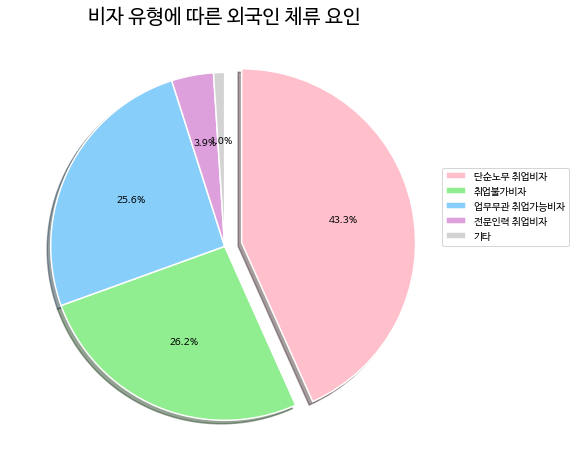

In [ ]:
#그래프 크기 설정
plt.rcParams['figure.figsize'] = (10, 8)

#비자 유형이 '단순노무 취업비자'인 항목 강조
explode = (0.1,0,0,0,0)

#색상 지정
colors = ['pink', 'lightgreen', 'lightskyblue', 'plum', 'lightgrey']

#테두리 그리기
wg = {'edgecolor': 'white', 'linewidth':1.5}

#원그래프 그리기
plt.title('비자 유형에 따른 외국인 체류 요인', fontsize = 20)
plt.pie(for_stay_group['응답수'], autopct = '%1.1f%%', colors = colors, 
        shadow = True, startangle=90, counterclock=False, explode = explode, wedgeprops = wg)

#범례 출력
plt.legend(for_stay_group['비자유형'], loc = (1, 0.5))

plt.show()



* 취업 유형에 따라 비자 유형을 구분한 결과 **단순노무 취업비자에 해당하는 비자를 소지한 외국인이 43.3%** 로, 가장 큰 수치로 나타남
* 업무무관 취업비자에 해당하는 비율은 25.6%로 적지 않은 수치인데, 그중 단순노무 업무 종사자, 전문직 종사자, 미취업자로 구분될 것을 고려하면 단순노무 취업자의 수치는 잠정적으로 더 클 것임을 유추할 수 있음



# **Ⅲ 이주노동자 관련 키워드 분석**
# **1. 뉴스 기사 크롤링_워드클라우드**

**1) 라이브러리 설치 및 불러오기**

In [ ]:
#sys 모듈 설치
import sys

In [ ]:
#필요 라이브러리 설치
!pip install beautifulsoup4
!pip install urllib3
!pip install openpyxl

#urllib : 특정 url 주소에 접근할 때 사용할 라이브러리
#beautifulsoup : url에서 html 정보를 파이썬에서 이해할 수 있는 언어로 변환하는 (parsing,파싱) 라이브러리

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#라이브러리 불러오기
from bs4 import BeautifulSoup
import requests
import openpyxl

**2) 크롤링을 위한 함수 생성**

In [ ]:
# 페이지 url 형식에 맞게 바꾸어 주는 함수 만들기
 #입력된 수를 1, 11, 21, 31 ...만들어 주는 함수
def makePgNum(num):
    if num == 1:
        return num
    elif num == 0:
        return num+1
    else:
        return num+9*(num-1)

In [ ]:
# 크롤링할 url 생성하는 함수 만들기(검색어, 크롤링 시작 페이지, 크롤링 종료 페이지)
def makeUrl(search,start_pg,end_pg):
    if start_pg == end_pg:
        start_page = makePgNum(start_pg)
        url = "https://search.naver.com/search.naver?where=news&sm=tab_pge&query=" + search + "&start=" + '&sort=0&photo=0&field=0&pd=5&ds=2021.05.26&de=2022.05.26&cluster_rank=16&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:1y,a:all' + "&start=" + str(start_page)
        print("생성url: ",url)
        return url
    else:
        urls= []
        for i in range(start_pg,end_pg+1):
            page = makePgNum(i)
            url = "https://search.naver.com/search.naver?where=news&sm=tab_pge&query=" + search + '&sort=0&photo=0&field=0&pd=5&ds=2021.05.26&de=2022.05.26&cluster_rank=16&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:1y,a:all' + "&start=" + str(page)
            urls.append(url)
        print("생성url: ",urls)
        return urls

In [ ]:
# html에서 원하는 속성 추출하는 함수 만들기 (기사, 추출하려는 속성값)
def news_attrs_crawler(articles,attrs):
    attrs_content=[]
    for i in articles:
        attrs_content.append(i.attrs[attrs])
    return attrs_content

In [ ]:
#뉴스기사 내용 크롤링하는 함수 만들기(각 뉴스의 url)
def news_contents_crawler(news_url):
    contents=[]
    for i in news_url:
        #각 기사 html get하기
        news = requests.get(i)
        news_html = BeautifulSoup(news.text,"html.parser")
            #기사 내용 가져오기 (p태그의 내용 모두 가져오기) 
        contents.append(news_html.find_all('p'))
    return contents

In [ ]:
#html생성해서 기사크롤링하는 함수 만들기(제목,url): 3개의 값을 반환함(제목, 링크, 내용)
def articles_crawler(url):
    #html 불러오기
    original_html = requests.get(i)
    html = BeautifulSoup(original_html.text, "html.parser")
    # 검색결과
    articles = html.select("div.group_news > ul.list_news > li div.news_area > a")
    title = news_attrs_crawler(articles,'title')
    url = news_attrs_crawler(articles,'href')
    content = news_contents_crawler(url)
    return title, url, content #3개의 값을 반환

**3) 뉴스 기사 크롤링**

In [ ]:
#검색어 입력
search = input("검색할 키워드를 입력해주세요:")

#검색 시작할 페이지 입력
page = int(input("\n크롤링할 시작 페이지를 입력해주세요. ex)1(숫자만입력):")) # ex)1 =1페이지,2=2페이지...
print("\n크롤링할 시작 페이지: ",page,"페이지")   
#검색 종료할 페이지 입력
page2 = int(input("\n크롤링할 종료 페이지를 입력해주세요. ex)1(숫자만입력):")) # ex)1 =1페이지,2=2페이지...
print("\n크롤링할 종료 페이지: ",page2,"페이지")   

# naver url 생성
url = makeUrl(search,page,page2)

#뉴스 크롤러 실행
news_titles = []
news_url =[]
news_contents =[]
for i in url:
    title, url,content = articles_crawler(url)
    news_titles.append(title)
    news_url.append(url)
    news_contents.append(content)

print("검색된 기사 갯수: 총 ",(page2+1-page)*10,'개')
print("\n[뉴스 제목]")
print(news_titles)
print("\n[뉴스 링크]")
print(news_url)
print("\n[뉴스 내용]")
print(news_contents)

검색할 키워드를 입력해주세요:외국인 노동자

크롤링할 시작 페이지를 입력해주세요. ex)1(숫자만입력):1

크롤링할 시작 페이지:  1 페이지

크롤링할 종료 페이지를 입력해주세요. ex)1(숫자만입력):2

크롤링할 종료 페이지:  2 페이지
생성url:  ['https://search.naver.com/search.naver?where=news&sm=tab_pge&query=외국인 노동자&sort=0&photo=0&field=0&pd=5&ds=2021.05.26&de=2022.05.26&cluster_rank=16&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:1y,a:all&start=1', 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=외국인 노동자&sort=0&photo=0&field=0&pd=5&ds=2021.05.26&de=2022.05.26&cluster_rank=16&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:1y,a:all&start=11']
검색된 기사 갯수: 총  20 개

[뉴스 제목]
[['외국인들도 깜짝 놀란, 한국 노동자의 목숨값 [넥스트브릿지]', "지역 주민·외국인 주민 `화합 한마당'", '올해 외국인 계절노동자 1000명 경남 온다', '충남도의회 복환위 “외국인·미혼모부 등 취약계층 살펴주길”', '외국인 계절노동자 397명 창녕·거창 투입', '"외국인 노동자 없어서 공사 못해"… 전문건설업계, 정부에 \'고용제한 해제\' 건의', '베트남 노동자 “20년치 임금을 한국에서 1년 만에 벌었다, 인증한다” (사진)', '[Why] 구글·아마존이 외국인 직원 자녀 ‘추방 금지’ 탄원서 제출한 이유', '대전 건설업계 구인난 호소 "외국인 고용 제한 해제 필요"', '“

**4) 크롤링 결과를 데이터프레임 및 csv 파일로 저장**

In [ ]:
#제목, 링크, 내용 1차원 리스트로 꺼내는 함수 생성
def makeList(newlist, content):
    for i in content:
        for j in i:
            newlist.append(j)
    return newlist
    
#제목, 링크, 내용 담을 리스트 생성
news_titles_1, news_url_1, news_contents_1 = [],[],[]

#1차원 리스트로 만들기(내용 제외)
makeList(news_titles_1,news_titles)
makeList(news_url_1,news_url)
makeList(news_contents_1,news_contents)


#데이터 프레임 만들기
news_df = pd.DataFrame({'title':news_titles_1,'link':news_url_1,'content':news_contents_1})
news_df.head(10)

,title,link,content
0,"외국인들도 깜짝 놀란, 한국 노동자의 목숨값 [넥스트브릿지]",http://www.ohmynews.com/NWS_Web/View/at_pg.asp...,"[[[메뉴 건너뛰기]], [[], [<img alt=""close"" src=""http..."
1,지역 주민·외국인 주민 `화합 한마당',http://www.cctimes.kr/news/articleView.html?id...,[[[지난 4월 문화재의 명칭을 국가유산으로 변경하겠다는 내용이 언론보도를 통해 알...
2,올해 외국인 계절노동자 1000명 경남 온다,http://www.idomin.com/news/articleView.html?id...,"[[외국인 계절노동자 1000여 명이 올해 경남지역 농촌 일손을 돕는다.], [경남..."
3,충남도의회 복환위 “외국인·미혼모부 등 취약계층 살펴주길”,http://www.shinailbo.co.kr/news/articleView.ht...,[[충남도의회 복지환경위원회가 도내 외국인·미혼모부 등 취약계층의 사회 제반 문제...
4,외국인 계절노동자 397명 창녕·거창 투입,https://news.kbs.co.kr/news/view.do?ncd=548138...,"[[\n, [배수영 기자], \n, [sooyoung@kbs.co.kr], \n],..."
5,"""외국인 노동자 없어서 공사 못해""… 전문건설업계, 정부에 '고용제한 해제' 건의",http://moneys.mt.co.kr/news/mwView.php?no=2022...,[[안녕하세요. 머니S 재테크부 김노향 기자입니다. 투자와 기업에 관련한 많은 제보...
6,"베트남 노동자 “20년치 임금을 한국에서 1년 만에 벌었다, 인증한다” (사진)",https://www.wikitree.co.kr/articles/761662,"[[2022-06-09 14:24], [\n, [<i class=""material-..."
7,[Why] 구글·아마존이 외국인 직원 자녀 ‘추방 금지’ 탄원서 제출한 이유,https://biz.chosun.com/international/internati...,[]
8,"대전 건설업계 구인난 호소 ""외국인 고용 제한 해제 필요""",http://www.chungnamilbo.co.kr/news/articleView...,[[[충남일보 김태진 기자] 대전 지역 건설업계가 구인난을 호소하며 이를 해소하기 ...
9,“체류자격 변경 외국인 건강보험 유지” 인권위 권고에 정부 불수용,https://news.kmib.co.kr/article/view.asp?arcid...,"[[\n, a href=""list.asp?sid1=mis"">¹Ì¼Ç</a><span..."


**5) 데이터 전처리**

In [ ]:
#csv 파일로 저장
news_df.to_csv('뉴스크롤링.csv', encoding = 'utf8')

In [6]:
#csv 파일 불러오기
example = pd.read_csv('NaverNews.csv')
example

,Unnamed: 0,title,link,content
0,0,[휴대폰 든 상자만 훔친 택배사 외국인일용직 2명 '덜미'],https://n.news.naver.com/mnews/article/003/001...,[\n\n\n\n\n[순천=뉴시스] 전남 순천경찰서. (사진=순천경찰서 제공·뉴시스...
1,1,"[방역지침 완화에 경북 시·군, 외국인 계절근로자 앞다퉈 도입]",https://n.news.naver.com/mnews/article/001/001...,[\n작년보다 2배 증가 1천614명 배정…포항·영덕 등 농·어가에 배치\n\n\n...
2,2,[“개시장 단골은 70대 노인과 외국인 노동자뿐... 이젠 접어야죠”],https://n.news.naver.com/mnews/article/023/000...,"[\n[아무튼, 주말] 이재명이 해결했다는 ‘숙제’성남 모란 개시장 가보니\t\t\..."
3,3,[부산 도금 공장에서 불…외국인 노동자 6명 대피],https://n.news.naver.com/mnews/article/056/001...,[\n\n\n\n\n오늘(20일) 새벽 1시 10분쯤 부산 사하구의 한 도금 공장 ...
4,4,[아파트 공사현장서 30대 노동자 사망… 광주 중대재해 처벌 1호 되나],https://n.news.naver.com/mnews/article/079/000...,[\n신축 아파트 공사현장서 펌프카 기둥 추락 인부 덮쳐중국 국적 노동자 1명 사망...
...,...,...,...,...
305,305,[[6·1 지방선거 후보 정책팸플릿] 철원군수],https://n.news.naver.com/mnews/article/654/000...,[\n고속도로 철원연장 한목소리…지역소멸 해법은 시각차민간 장례시설 외 대부분 전원...
306,306,[충북 음성서 고기 가공업체 외국인 노동자 등 66명 무더기 확진],https://n.news.naver.com/mnews/article/028/000...,[\n충북 14일 105명 확진 역대 하루 최다…위·중증 병상 2개 남아\n\n\n...
307,307,[“외국인노동자 코로나 검사 의무는 차별”…지자체 행정명령 철회],https://n.news.naver.com/mnews/article/081/000...,[\n\n\n\n\n서울 양천구의 한 공사현장에 설치된 ‘찾아가는 선별진료소’에서 ...
308,308,[“외국인노동자 코로나 검사 의무는 차별”…지자체 행정명령 철회],https://n.news.naver.com/mnews/article/081/000...,[\n\n\n\n\n서울 양천구의 한 공사현장에 설치된 ‘찾아가는 선별진료소’에서 ...


In [7]:
#컬럼명 변경
data = example[['title', 'content']]
data

,title,content
0,[휴대폰 든 상자만 훔친 택배사 외국인일용직 2명 '덜미'],[\n\n\n\n\n[순천=뉴시스] 전남 순천경찰서. (사진=순천경찰서 제공·뉴시스...
1,"[방역지침 완화에 경북 시·군, 외국인 계절근로자 앞다퉈 도입]",[\n작년보다 2배 증가 1천614명 배정…포항·영덕 등 농·어가에 배치\n\n\n...
2,[“개시장 단골은 70대 노인과 외국인 노동자뿐... 이젠 접어야죠”],"[\n[아무튼, 주말] 이재명이 해결했다는 ‘숙제’성남 모란 개시장 가보니\t\t\..."
3,[부산 도금 공장에서 불…외국인 노동자 6명 대피],[\n\n\n\n\n오늘(20일) 새벽 1시 10분쯤 부산 사하구의 한 도금 공장 ...
4,[아파트 공사현장서 30대 노동자 사망… 광주 중대재해 처벌 1호 되나],[\n신축 아파트 공사현장서 펌프카 기둥 추락 인부 덮쳐중국 국적 노동자 1명 사망...
...,...,...
305,[[6·1 지방선거 후보 정책팸플릿] 철원군수],[\n고속도로 철원연장 한목소리…지역소멸 해법은 시각차민간 장례시설 외 대부분 전원...
306,[충북 음성서 고기 가공업체 외국인 노동자 등 66명 무더기 확진],[\n충북 14일 105명 확진 역대 하루 최다…위·중증 병상 2개 남아\n\n\n...
307,[“외국인노동자 코로나 검사 의무는 차별”…지자체 행정명령 철회],[\n\n\n\n\n서울 양천구의 한 공사현장에 설치된 ‘찾아가는 선별진료소’에서 ...
308,[“외국인노동자 코로나 검사 의무는 차별”…지자체 행정명령 철회],[\n\n\n\n\n서울 양천구의 한 공사현장에 설치된 ‘찾아가는 선별진료소’에서 ...


In [8]:
#예시 파일을 txt 파일로 정리
data.to_csv('NaverNews_data.txt')

**6) 시각화_워드클라우드**

In [9]:
!pip install konlpy
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
from PIL import Image

In [11]:
with open('NaverNews_data.txt', 'r', encoding='utf-8') as f:
    text = f.read()

#명사만 추출
okt = Okt()
nouns = okt.nouns(text)

#단어의 길이가 1개인 것은 제외
words = [n for n in nouns if len(n) > 1]

#위에서 얻은 words를 처리해 단어별 빈도수 형태의 딕셔너리 데이터 도출
keyword = Counter(words)
keyword.pop('외국인') #의미 없는 단어 삭제 (검색 키워드 삭제)
keyword.pop('노동자')

1547

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


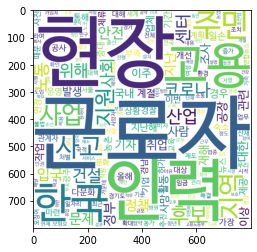

In [12]:
#한글로 워드클라우드 시각화
wc = WordCloud(font_path='NanumBarunGothic', background_color='white', width=400, height=400, scale=2.0, max_font_size=250)
cloud = wc.generate_from_frequencies(keyword)
plt.figure()
plt.imshow(cloud)

In [13]:
#파일로 저장
wc.to_file('워드클라우드_사각형.png')

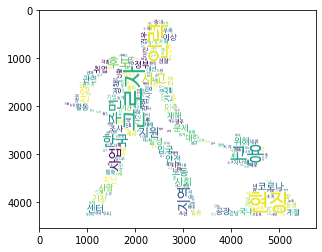

In [14]:
#사진 모양대로 워드클라우드 만들기
img = Image.open('worker.png')
img_array = np.array(img)

wc = WordCloud(font_path='NanumBarunGothic', background_color='white', width=400, height=400, scale=2.0, max_font_size=250, mask=img_array)
gen = wc.generate_from_frequencies(keyword)

plt.figure()
plt.imshow(gen)

In [ ]:
#파일로 저장
wc.to_file('워드클라우드_일하는사람.png')



*   검색어인‘외국인'과 '노동자'를 제외하자 노동자와 유사한 의미로 쓰이는 ‘근로자'라는 단어가 가장 많이 사용된 것으로 나타남, 또한 **현장, 고용, 인력, 코로나, 안전, 사고, 재해** 등의 단어가 큰 비중 차지

*   뉴스 크롤링을 통해 언론에서의 자주 언급되는 이주노동자(외국인 노동자)와 관련된 키워드를 파악할 수 있었음
* 현장, 인력, 안전, 재해, 공장 등의 단어가 많이 등장하는 것을 통해 **이주노동자
(외국인 노동자)의 근로 환경에 주목하고 있다고 유추** 할 수 있음

# **2. 뉴스 기사 크롤링_gephi**

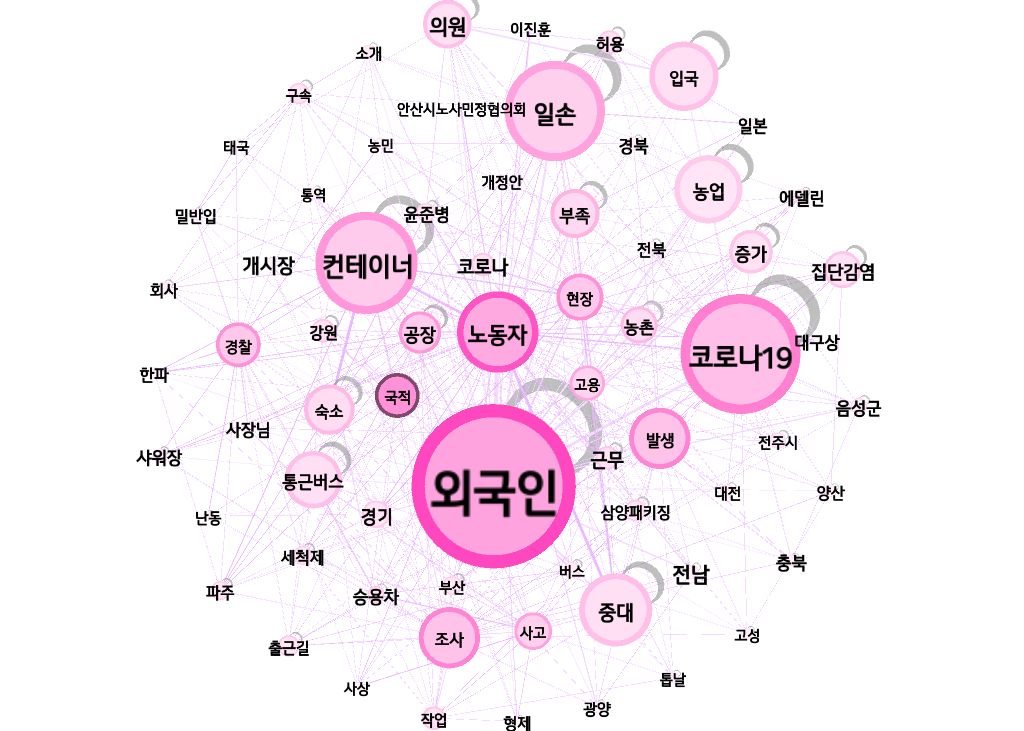

* 뉴스 기사 속 이주노동자 복지 관련 키워드들을 네트워크 분석 프로그램인 gephi를 이용해 시각화함, 워드클라우드와 유사하면서도 **키워드 간 네트워크까지 파악할 수 있어 유용**
* 네트워크 분석 특성 상 키워드들 간의 대략적인 관계는 알 수 있으나 자세한 연관성은 파악하기 힘듦, 또한 기사 내의 키워드들을 모두 포함하기 어려워 시각화 과정에서 많은 제거가 이루어짐

# **3. 국가별 이주노동자가 자주 사용하는 단어**

**1) 우즈베키스탄**

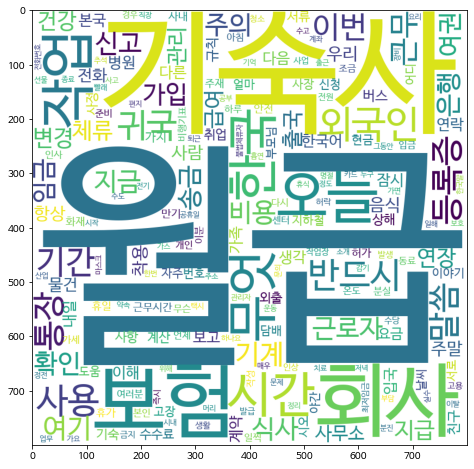

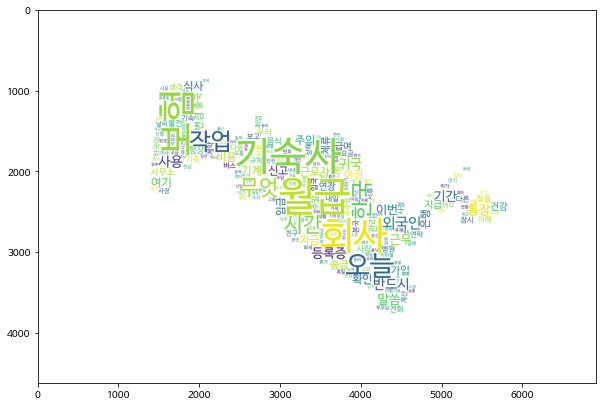

In [ ]:
#우즈베키스탄 파일 불러오기
UZB = pd.read_csv('한국산업인력공단_외국인근로자가 자주 쓰는 외국어(우즈베키스탄).csv', encoding='cp949')
UZB

#한국어 문장만 추출
UZB_korean = UZB['한국어_문장']
UZB_korean

#txt파일로 저장
UZB_korean.to_csv('UZB_korean.txt')

#우즈베키스탄_단어추출
with open('UZB_korean.txt', 'r', encoding='utf-8') as f:
    text_UZB = f.read()

okt = Okt()
nouns = okt.nouns(text_UZB) # 명사만 추출

words_UZB = [n for n in nouns if len(n) > 1]

c_UZB = Counter(words_UZB) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함
c_UZB.pop('당신') #의미 없는 단어 삭제


#한글로 워드클라우드 시각화
wc = WordCloud(font_path='NanumBarunGothic', background_color='white', width=400, height=400, scale=2.0, max_font_size=250)
cloud_UZB = wc.generate_from_frequencies(c_UZB)

plt.figure()
plt.imshow(cloud_UZB)

#파일로 저장하기
wc.to_file('우즈베키스탄_워드클라우드.png')

#사진 모양대로 워드클라우드 만들기
img = Image.open('우즈베키스탄_지도.png')
img_array = np.array(img)

wc = WordCloud(font_path='NanumBarunGothic', background_color='white', width=400, height=400, scale=2.0, max_font_size=250, mask=img_array)
gen = wc.generate_from_frequencies(c_UZB)

plt.figure()
plt.imshow(gen)

#파일로 저장하기
wc.to_file('우즈베키스탄_워드클라우드_국가모양.png')

**2) 인도네시아**

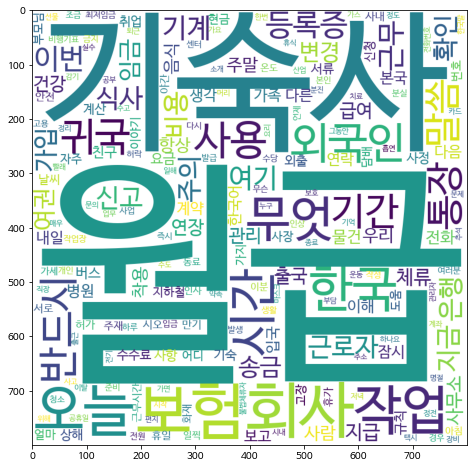

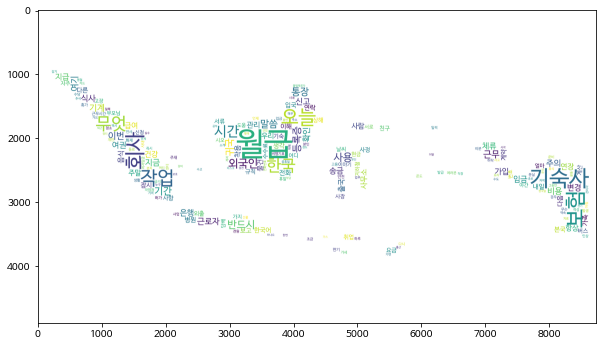

In [ ]:
#인도네시아 파일 불러오기
INA = pd.read_csv('한국산업인력공단_외국인근로자가 자주 쓰는 외국어(인도네시아).csv', encoding='cp949')
INA

#한국어 문장만 추출
INA_korean = INA['한국어_문장']
INA_korean

#txt파일로 저장
INA_korean.to_csv('INA_korean.txt')

#우즈베키스탄_단어 추출
with open('INA_korean.txt', 'r', encoding='utf-8') as f:
    text_INA = f.read()

#명사만 추출
okt = Okt()
nouns = okt.nouns(text_INA)
#단어의 길이가 1개인 것은 제외
words_INA = [n for n in nouns if len(n) > 1]

#위에서 얻은 words를 처리해 단어별 빈도수 형태의 딕셔너리 데이터 도출
c_INA = Counter(words_INA)
#의미 없는 단어 삭제
c_INA.pop('당신')

#한글로 워드클라우드 시각화
wc = WordCloud(font_path='NanumBarunGothic', background_color='white', width=400, height=400, scale=2.0, max_font_size=250)
cloud_INA = wc.generate_from_frequencies(c_INA)

plt.figure()
plt.imshow(cloud_INA)

#워드클라우드를 파일로 저장
wc.to_file('인도네시아_워드클라우드.png')

#국가 형태대로 워드클라우드 구현
img = Image.open('인도네시아_지도.png')
img_array = np.array(img)

wc = WordCloud(font_path='NanumBarunGothic', background_color='white', width=400, height=400, scale=2.0, max_font_size=250, mask=img_array)
gen = wc.generate_from_frequencies(c_INA)

plt.figure()
plt.imshow(gen)

#파일로 저장
wc.to_file('인도네시아_워드클라우드_국가모양.png')

 **3) 중국**

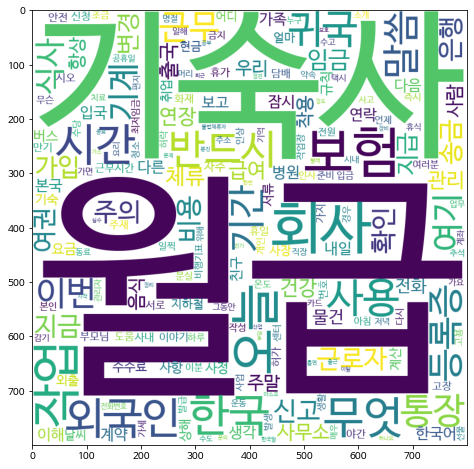

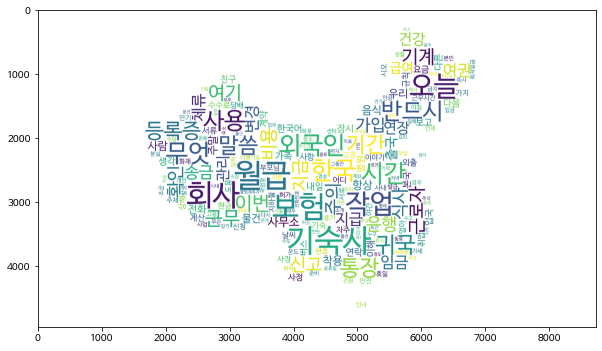

In [ ]:
#중국 파일 불러오기
CHN = pd.read_csv('한국산업인력공단_외국인근로자가 자주 쓰는 외국어(중국).csv', encoding='cp949')
CHN

#한국어 문장만 추출
CHN_korean = CHN['한국어']
CHN_korean

#txt파일로 저장
CHN_korean.to_csv('CHN_korean.txt')

#우즈베키스탄_단어 추출
with open('CHN_korean.txt', 'r', encoding='utf-8') as f:
    text_CHN = f.read()

#명사만 추출
okt = Okt()
nouns = okt.nouns(text_CHN)
#단어의 길이가 1개인 것은 제외
words = [n for n in nouns if len(n) > 1]

#위에서 얻은 words를 처리해 단어별 빈도수 형태의 딕셔너리 데이터 도출
c_CHN = Counter(words)
#의미 없는 단어 삭제
c_CHN.pop('당신')

#한글로 워드클라우드 시각화
wc = WordCloud(font_path='NanumBarunGothic', background_color='white', width=400, height=400, scale=2.0, max_font_size=250)
cloud_CHN = wc.generate_from_frequencies(c_CHN)

plt.figure()
plt.imshow(cloud_CHN)

#워드클라우드를 파일로 저장
wc.to_file('중국_워드클라우드.png')

#국가 형태대로 워드클라우드 구현
img = Image.open('중국_지도.png')
img_array = np.array(img)

wc = WordCloud(font_path='NanumBarunGothic', background_color='white', width=400, height=400, scale=2.0, max_font_size=250, mask=img_array)
gen = wc.generate_from_frequencies(c_CHN)

plt.figure()
plt.imshow(gen)

#파일로 저장
wc.to_file('중국_워드클라우드_국가모양.png')

**4) 키르기스스탄**

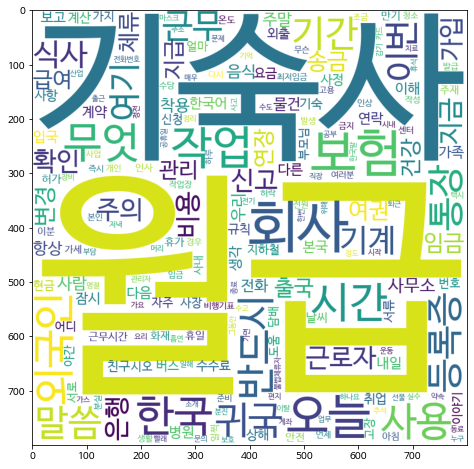

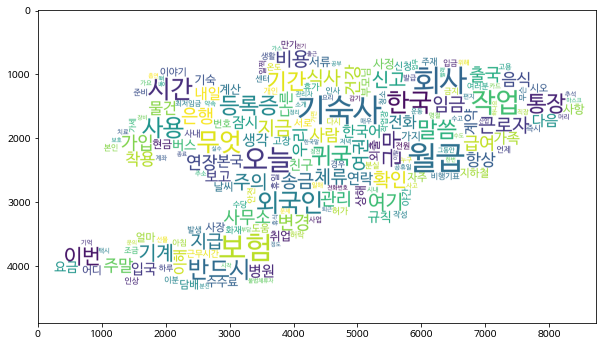

In [ ]:
#키르기스스탄 파일 불러오기
KGZ = pd.read_csv('한국산업인력공단_외국인근로자가 자주 쓰는 외국어(키르기스스탄).csv', encoding='cp949')
KGZ

#한국어 문장만 추출
KGZ_korean = KGZ['한국어']
KGZ_korean

#txt파일로 저장
KGZ_korean.to_csv('KGZ_korean.txt')

#우즈베키스탄_단어 추출
with open('KGZ_korean.txt', 'r', encoding='utf-8') as f:
    text_KGZ = f.read()

#명사만 추출
okt = Okt()
nouns = okt.nouns(text_KGZ)
#단어의 길이가 1개인 것은 제외
words = [n for n in nouns if len(n) > 1]

#위에서 얻은 words를 처리해 단어별 빈도수 형태의 딕셔너리 데이터 도출
c_KGZ = Counter(words)
#의미 없는 단어 삭제
c_KGZ.pop('당신')


#한글로 워드클라우드 시각화
wc = WordCloud(font_path='NanumBarunGothic', background_color='white', width=400, height=400, scale=2.0, max_font_size=250)
cloud_KGZ = wc.generate_from_frequencies(c_KGZ)

plt.figure()
plt.imshow(cloud_KGZ)

#워드클라우드를 파일로 저장
wc.to_file('키르기스스탄_워드클라우드.png')

#국가 형태대로 워드클라우드 구현
img = Image.open('키르기스스탄_지도.png')
img_array = np.array(img)

wc = WordCloud(font_path='NanumBarunGothic', background_color='white', width=400, height=400, scale=2.0, max_font_size=250, mask=img_array)
gen = wc.generate_from_frequencies(c_KGZ)

plt.figure()
plt.imshow(gen)

#파일로 저장
wc.to_file('키르기스스탄_워드클라우드_국가모양.png')

**5) 필리핀**

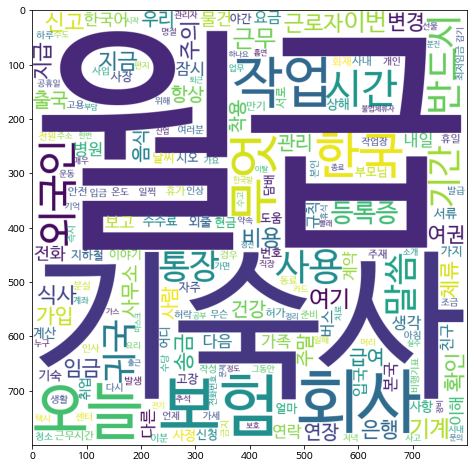

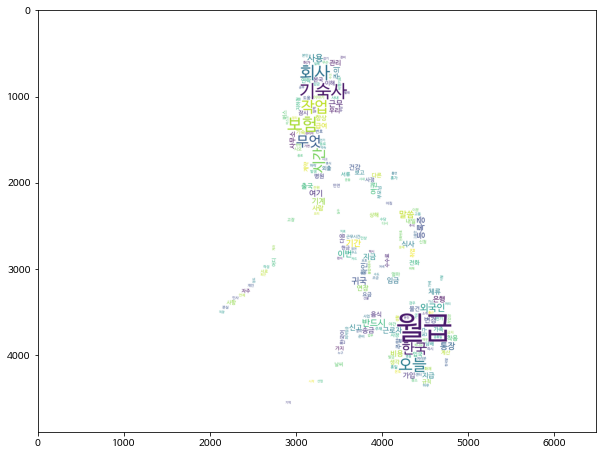

In [ ]:
#필리핀 파일 불러오기
PHI = pd.read_csv('한국산업인력공단_외국인근로자가 자주 쓰는 외국어(필리핀).csv', encoding='cp949')
PHI

#한국어 문장만 추출
PHI_korean = PHI['한국어 문장']
PHI_korean

#txt파일로 저장
PHI_korean.to_csv('PHI_korean.txt')

#우즈베키스탄_단어 추출
with open('PHI_korean.txt', 'r', encoding='utf-8') as f:
    text_PHI = f.read()

#명사만 추출
okt = Okt()
nouns = okt.nouns(text_PHI)
#단어의 길이가 1개인 것은 제외
words = [n for n in nouns if len(n) > 1]

#위에서 얻은 words를 처리해 단어별 빈도수 형태의 딕셔너리 데이터 도출
c_PHI = Counter(words)
#의미 없는 단어 삭제
c_PHI.pop('당신') 

#한글로 워드클라우드 시각화
wc = WordCloud(font_path='NanumBarunGothic', background_color='white', width=400, height=400, scale=2.0, max_font_size=250)
cloud_PHI = wc.generate_from_frequencies(c_PHI)

plt.figure()
plt.imshow(cloud_PHI)

#워드클라우드를 파일로 저장
wc.to_file('필리핀_워드클라우드.png')

#국가 형태대로 워드클라우드 구현
img = Image.open('필리핀_지도.png')
img_array = np.array(img)

wc = WordCloud(font_path='NanumBarunGothic', background_color='white', width=400, height=400, scale=2.0, max_font_size=250, mask=img_array)
gen = wc.generate_from_frequencies(c_PHI)

plt.figure()
plt.imshow(gen)

#파일로 저장
wc.to_file('필리핀_워드클라우드_국가모양.png')

* 5개 국가 모두 공통적으로 ‘월급', ‘기숙사'라는 단어가 가장 많이 사용되는 것으로 나타남, 또한 보험, 회사, 통장 등의 단어가 자주 언급
* 각국 이주노동자들이 한국에서 생활하면서 어떤 단어를 자주 사용하였는지 알아봄으로써 이주노동자의 생활에서 어떤 부분이 가장 중요하게 여기지는지에 대해 파악할 수 있었음
* 워드클라우드에서 월급과 기숙사가 가장 큰 비중을 차지하는 것으로 보아 **경제적, 주거적 환경과 관련된 요소가 이들의 생활에 가장 큰 영향을 미치고 있다**고 볼 수 있음


# **Ⅳ 이주노동자 근로 환경 분석**
# **1. 근로 유형별 임금 수준**

In [ ]:
#csv 파일 불러오기
wage = pd.read_csv('월평균_임금수준.csv', encoding='cp949')
wage.head()

,대상별(1),특성별(1),특성별(2),2021,2021.1,2021.2,2021.3,2021.4
0,대상별(1),특성별(1),특성별(2),합계 (천명),100만원 미만 (천명),100만원 이상 ~ 200만원 미만 (천명),200만원 이상 ~ 300만원 미만 (천명),300만원 이상 (천명)
1,이민자,성별,계,838.0,38.7,185.2,432.6,181.6
2,이민자,성별,남자,556.4,13.4,76.6,304.8,161.7
3,이민자,성별,여자,281.6,25.3,108.6,127.7,20.0
4,외국인,성별,계,811.3,36.0,174.2,423.7,177.4


**1) 데이터 전처리**

In [ ]:
#대상별, 특성별(1), 합계 컬럼 제거
wage = wage.drop(['대상별(1)', '특성별(1)', '2021'], axis=1)

#컬럼명 정제
wage.columns = ['체류자격', '100만원 미만', '100만원 이상~200만원 미만', '200만원 이상~300만원 미만', '300만원 이상']

#인덱스를 '체류자격' 컬럼으로 변경
wage = wage.set_index('체류자격')

#8~14번째 열만 추출
wage = wage.iloc[8:14]

#비전문취업의 100만원 미만 항목을 0으로 변경
wage.iat[0, 0] = 0.0

#데이터 타입을 실수형으로 변환
wage = wage.astype('float')

#각 칼럼 평균 도출
wage_mean = pd.DataFrame(wage.mean())

#컬럼명 변경
wage_mean.columns = ['종합']

wage_mean

,종합
100만원 미만,4.600000
100만원 이상~200만원 미만,22.000000
200만원 이상~300만원 미만,61.966667
300만원 이상,24.850000


In [ ]:
#비자 유형 컬럼 추가
wage = wage.assign(비자유형 = ['단순노무 취업비자']*2 + ['전문인력 취업비자'] + ['취업불가비자']
                   + ['전문인력 취업비자'] + ['업무무관 취업가능비자'])

#비자유형을 기준으로 각 컬럼을 그룹화한 후 평균 도출
wage_group = wage.groupby('비자유형')['100만원 미만', '100만원 이상~200만원 미만',
                                                    '200만원 이상~300만원 미만', '300만원 이상'].mean()

#단순노무 취업비자 평균값만 추출
wage_labor = pd.DataFrame(wage_group.iloc[0])

wage_labor.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,단순노무 취업비자
100만원 미만,0.95
100만원 이상~200만원 미만,26.10
200만원 이상~300만원 미만,100.45
300만원 이상,26.95


In [ ]:
#유학생 항목 제거
wage_drop = wage.drop(wage.index[3])
wage_drop

#각 칼럼 평균 도출
wage_drop_mean = pd.DataFrame(wage_drop.mean())

#컬럼명 변경
wage_drop_mean.columns = ['유학생 제외']

#'유학생 항목을 제외한 평균'과 '단순노무 취업비자 평균'과 종합 데이터프레임 병합
wage_drop_concat = pd.concat([wage_drop_mean, wage_labor,wage_mean], axis = 1)
wage_drop_concat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,유학생 제외,단순노무 취업비자,종합
100만원 미만,2.48,0.95,4.600000
100만원 이상~200만원 미만,23.02,26.10,22.000000
200만원 이상~300만원 미만,74.14,100.45,61.966667
300만원 이상,29.80,26.95,24.850000


**2) 시각화_다중막대그래프**

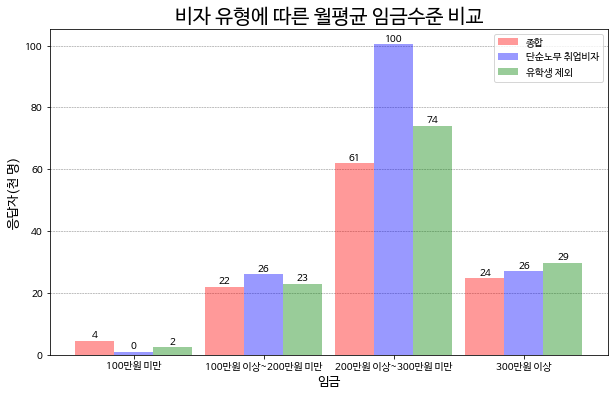

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))
bar_width = 0.3

index = np.arange(4)

b1 = plt.bar(index, wage_drop_concat['종합'], bar_width, color = 'red', alpha = 0.4, label = '종합')
b2 = plt.bar(index+bar_width, wage_drop_concat['단순노무 취업비자'], bar_width, color = 'blue', alpha = 0.4, label = '단순노무 취업비자')
b3 = plt.bar(index + 2 * bar_width,wage_drop_concat['유학생 제외'], bar_width, color = 'green', alpha = 0.4, label = '유학생 제외')


plt.xticks(np.arange(bar_width, 4+bar_width, 1), wage)
plt.title('비자 유형에 따른 월평균 임금수준 비교', fontsize = 20)
plt.xlabel('임금', size = 13)
plt.ylabel('응답자(천 명)', size = 13)

#보조선 출력
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)

#각 라벨 값 표시
def autolabel(b):
    for b in b:
        height = b.get_height()
        ax.text(b.get_x() + b.get_width()/2., 1*height,
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(b1)
autolabel(b2)
autolabel(b3)

plt.legend()
plt.show()

* 취업 불가 비자인 '유학' 비자 소지 외국인은 통계 자료 원본에서 임금 수준이 대부분  100만원 미만, 100만원 이상~200만원 미만에 분포하는 것으로 보아 아르바이트 개념의 업무를 했을 것으로 유추, 따라서 **유학생을 제외한 비교를 분석하는 것이 유의미함**
* 전체 평균과 단순노무 취업비자 외국인의 임금 수준을 비교했을 때 100만원 미만 항목을 제외하고 모두 단순노무 취업비자 외국인, 즉 이주노동자의 수치가 높게 나타남
-유학비자 항목을 제외하고 비교했을 때에는 300만원 이상 항목에서 차이가 나타남, 나머지 항목에서도 수치 차이가 좁혀졌지만 단순노무 취업비자의 수치가 높았음
-우리나라의 **외국인 비자가 총 30여 개인 것에 비해 통계 자료의 비자 종류는 6개로 매우 한정적임** , 위 분석으로 이주노동자 임금 수준을 단정짓기 어려움


# **2. 산재 발생 시 비용 부담 주체**

In [ ]:
#csv 파일 불러오기
treat= pd.read_csv('작업_중_부상의_치료비_지불방법.csv', encoding='cp949')
treat

,특성별(1),특성별(2),특성별(3),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6
0,특성별(1),특성별(2),특성별(3),합계 (%),산업 재해 보상 보험금으로 처리 (%),사업주가 치료비 전액 부담 (%),사업주와 공동으로 치료비 부담 (%),본인이 치료비 전액 부담 (%),국가에 가입되어 있는 건강보험으로 처리 (%),기타 (%)
1,성별,계,소계,100.0,29.9,21.3,3.9,24.4,18.9,1.6
2,성별,남자,소계,100.0,33.3,21.2,4.0,22.2,16.2,2.0
3,성별,여자,소계,100.0,20.7,20.7,0.0,31.0,27.6,0.0
4,체류자격별,계,소계,100.0,29.9,21.3,3.9,24.4,18.9,1.6
5,체류자격별,방문취업(H-2),소계,100.0,35.3,14.7,2.9,23.5,20.6,0.0
6,체류자격별,방문취업(H-2),남자,100.0,39.3,10.7,3.6,25.0,17.9,-
7,체류자격별,방문취업(H-2),여자,100.0,14.3,28.6,-,28.6,14.3,0.0
8,체류자격별,재외동포(F-4),소계,100.0,28.0,22.6,3.2,23.7,19.4,2.2
9,체류자격별,재외동포(F-4),남자,100.0,29.6,25.4,4.2,22.5,15.5,2.8


**1) 데이터 전처리**

In [ ]:
#필요하지 않은 컬럼 제거
treat = treat.drop(['특성별(1)', '특성별(3)', '2021'], axis = 1)

#컬럼명 정제
treat.columns = ['체류자격', '산업재해 보상 보험금으로 처리', '사업주가 치료비 전액 부담', '사업주와 공동으로 치료비 부담',
                     '본인이 치료비 전액 부담', '국가에 가입되어 있는 건강보험으로 처리', '기타']
treat.head()

,체류자격,산업재해 보상 보험금으로 처리,사업주가 치료비 전액 부담,사업주와 공동으로 치료비 부담,본인이 치료비 전액 부담,국가에 가입되어 있는 건강보험으로 처리,기타
0,특성별(2),산업 재해 보상 보험금으로 처리 (%),사업주가 치료비 전액 부담 (%),사업주와 공동으로 치료비 부담 (%),본인이 치료비 전액 부담 (%),국가에 가입되어 있는 건강보험으로 처리 (%),기타 (%)
1,계,29.9,21.3,3.9,24.4,18.9,1.6
2,남자,33.3,21.2,4.0,22.2,16.2,2.0
3,여자,20.7,20.7,0.0,31.0,27.6,0.0
4,계,29.9,21.3,3.9,24.4,18.9,1.6


In [ ]:
#방문취업 합계 항목만 가져오기
treat_visit = pd.DataFrame(treat.iloc[5])

#첫번재 행을 컬럼으로 지정
treat_visit = treat_visit.rename(columns = treat_visit.iloc[0])

#첫번째 행 삭제
treat_visit = treat_visit.drop(treat_visit.index[0])

treat_visit

,방문취업(H-2)
산업재해 보상 보험금으로 처리,35.3
사업주가 치료비 전액 부담,14.7
사업주와 공동으로 치료비 부담,2.9
본인이 치료비 전액 부담,23.5
국가에 가입되어 있는 건강보험으로 처리,20.6
기타,0.0


In [ ]:
#재외동포 합계 항목만 가져오기
treat_overseas = pd.DataFrame(treat.iloc[8])

#첫번재 행을 컬럼으로 지정
treat_overseas = treat_overseas.rename(columns = treat_overseas.iloc[0])

#첫번째 행 삭제
treat_overseas = treat_overseas.drop(treat_overseas.index[0])

treat_overseas

,재외동포(F-4)
산업재해 보상 보험금으로 처리,28.0
사업주가 치료비 전액 부담,22.6
사업주와 공동으로 치료비 부담,3.2
본인이 치료비 전액 부담,23.7
국가에 가입되어 있는 건강보험으로 처리,19.4
기타,2.2


**2) 시각화_다중 원그래프**

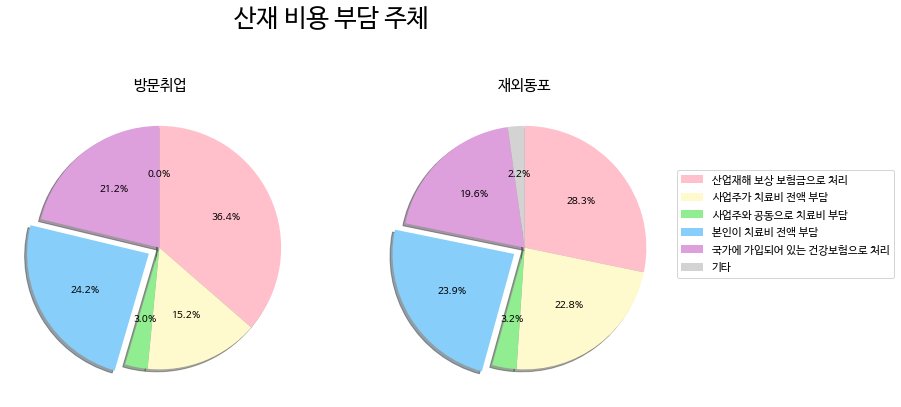

In [ ]:
#그래프 크기 설정
plt.rcParams['figure.figsize'] = (12, 7)

#색상 지정
colors = ['pink', 'lemonchiffon', 'lightgreen', 'lightskyblue', 'plum', 'lightgray']

#'본인이 치료비 전액 부담' 항목 강조
explode = (0,0,0,0.1,0,0)

#다중 원그래프 그리기
plt.subplot(1, 2, 1)
plt.title('방문취업', fontsize = 15)
plt.pie(treat_visit['방문취업(H-2)'], autopct = '%1.1f%%', colors = colors, 
        shadow = True, startangle=90, counterclock=False, explode = explode) 

plt.subplot(1, 2, 2)  
plt.title('재외동포', fontsize = 15)
plt.pie(treat_overseas['재외동포(F-4)'], autopct = '%1.1f%%', colors = colors, 
        shadow = True, startangle=90, counterclock=False, explode = explode) 

#공통 타이틀 설정
plt.suptitle('산재 비용 부담 주체',fontsize = 25)
plt.legend(treat_visit.index, loc = (1, 0.4), fontsize = 11)
plt.show()

* 방문취업과 재외동포(둘 다 단순노무 취업비자로 분류) 모두 **본인이 치료비 전액 부담 항목이 각각 24.2%, 23.9%로 상당한 비율을 차지함**
-산업재해 보상 보험금, 건강보험 모두 4대 보험에 해당, 보험에 가입되어 있어도 원청에 피해가 간다는 이유로 산재를 거절하는 하청업체들 多, 하청노동자들이 피해를 감수하고 본인이 비용을 부담하는 경우 대다수인 현실이 통계에 반영되었을 것으로 보임
-국내 노동자와의 비교는 이루어지지 않았기 때문에 **이주노동자만의 문제가 아닐 수 있음**


# **Ⅴ 이주노동자 복지 현황 분석**
# **1. 이주노동자 복지 연구 동향**

**1) 논문 크롤링**

In [ ]:
import requests as req
from bs4 import BeautifulSoup as bs

#RISS에서 크롤링하고자 하는 검색어 입력 -> URL
page = int(input("페이지 수 : "))
search = input("검색어 : ")

url = "https://www.riss.kr/search/Search.do?isDetailSearch=N&searchGubun=true&viewYn=OP&query={}&queryText=&iStartCount={}&iGroupView=5&icate=all&colName=re_a_kor&exQuery=&exQueryText=&order=%2FDESC&onHanja=false&strSort=RANK&pageScale=10&orderBy=&fsearchMethod=search&isFDetailSearch=N&sflag=1&searchQuery={}&fsearchSort=&fsearchOrder=&limiterList=&limiterListText=&facetList=&facetListText=&fsearchDB=&resultKeyword={}&pageNumber=1&p_year1=&p_year2=&dorg_storage=&mat_type=&mat_subtype=&fulltext_kind=&t_gubun=&learning_type=&language_code=&ccl_code=&language=&inside_outside=&fric_yn=&image_yn=&regnm=&gubun=&kdc=&ttsUseYn="

페이지 수 : 10
검색어 : 외국인 노동자


In [ ]:
#새로운 데이터프레임 생성
df_info = pd.DataFrame(columns = ['저자', '국문 제목', '수록지', '국문 요약', '링크'])

authors = []
k_titles = []
books = []
abstracts = []

links = []

headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36'}

for i in range(page) :
    page_num = i * 10
    # print(page_num)
    
    res = req.get(url.format(search, page_num, search, search), headers = headers)
    html = bs(res.text, 'html.parser')
    items = html.findAll('div', {'class' : 'cont'})

    
    for item in items :
        # print(item)
        r_items = item.findAll('p', {'class' : 'title'})
        
        try : 
            abstract = item.find("p", {'class' : 'preAbstract'}).text.strip()
            abstracts.append(abstract)
        except Exception as ex :
            abstracts.append("")
        # print(abstract)
        # print("************")
    
        for detail in r_items :
            links.append(detail.find("a")["href"])
            k_titles.append(detail.find("a").text)
        
            
    for item in items :
        r_items = item.findAll('p', {'class' : 'etc'})
        for detail in r_items :
            authors.append(item.find("span", {'class' : 'writer'}).text)
            books.append(item.find("span", {'class' : 'assigned'}).text)
          
len(links), len(authors), len(k_titles), len(books), len(abstracts)

df_info['저자'] = authors
df_info['국문 제목'] = k_titles
df_info['수록지'] = books
df_info['국문 요약'] = abstracts
df_info['링크'] = links

df_info.to_csv('논문크롤링.txt')

**2) 시각화_워드클라우드**

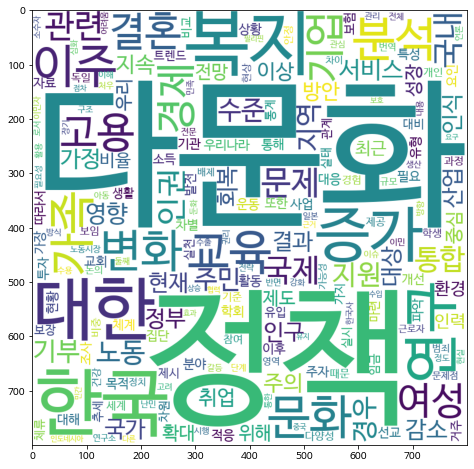

In [ ]:
with open('논문크롤링.txt', 'r', encoding='utf-8') as f:
    text = f.read()

#명사만 추출
okt = Okt()
nouns = okt.nouns(text)
#단어의 길이가 1개인 것은 제외
words = [n for n in nouns if len(n) > 1]

#위에서 얻은 words를 처리해 단어별 빈도수 형태의 딕셔너리 데이터 도출
c = Counter(words)

#불필요한 단어 제거 
c.pop('외국인')
c.pop('노동자')
c.pop('사회')

#한글로 워드클라우드 시각화
wc = WordCloud(font_path='NanumBarunGothic', background_color='white', width=400, height=400, scale=2.0, max_font_size=250)
cloud = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(cloud)

* 이주노동자 복지 관련 최신 연구 동향을 워드클라우드를 통해 시각적으로 파악할 수 있었고, 분석 결과 **정책, 교육, 고용 등의 키워드 多**
* 연구 동향 분석 시 키워드의 빈도 수를 활용하기도 하지만, 이것만으로 정확한 연구 동향을 파악했다고 보기 어려움, 또한 워드클라우드 시각화 후 불필요한 단어를 임의로 제거하였는데, **특정 단어가 불필요하다고 보는 시각은 개개인마다 다르다는 점에서 한계**


# **2. 이주노동자 지원센터 분포**

In [ ]:
import seaborn as sns
import folium

!pip install googlemaps 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for googlemaps: filename=googlemaps-4.6.0-py3-none-any.whl size=38554 sha256=248a5dc097b7d5691e20bee066764bdacfc1de5db961a33908ecdec99a22348f
  Stored in directory: /root/.cache/pip/wheels/80/db/c0/6d958585fa97b20e250bf437acf7e6e715b4809c2dd4e55367
Successfully built googlemaps


**1) 데이터 전처리**

In [ ]:
#원본 csv 파일 불러오기
foreign_faccent = pd.read_csv('원래외노지원센터.csv')
foreign_faccent.head()

,순번,유형,기관명,소재지,연락처
0,1,거점센터,(사)지구촌사랑나눔,서울 구로구,02-6900-8000
1,2,거점센터,신한대학교 산학협력단,경기 의정부시,031-838-9111
2,3,거점센터,인제대학교,경남 김해시,055-338-2727
3,4,거점센터,사회복지법인 통도사자비원,경남 창원시,055-253-5270
4,5,거점센터,인천경총 및 한국노총 공동수급체,인천 남동구,032-431-4545


In [ ]:
#위치 정보를 추가한 csv 파일 불러오기
foreign_faccent = pd.read_csv('외노지원센터.csv')
foreign_faccent.head()

,순번,유형,기관명,소재지,연락처,lat,lng
0,1,거점센터,(사)지구촌사랑나눔,서울 구로구,02-6900-8000,37.478752,126.896011
1,2,거점센터,신한대학교 산학협력단,경기 의정부시,031-838-9111,37.709416,127.043019
2,3,거점센터,인제대학교,경남 김해시,055-338-2727,35.248638,128.902946
3,4,거점센터,사회복지법인 통도사자비원,경남 창원시,055-253-5270,35.196265,128.566822
4,5,거점센터,인천경총 및 한국노총 공동수급체,인천 남동구,032-431-4545,37.454099,126.697833


In [ ]:
#필요한 컬럼만 슬라이싱
slicing = foreign_faccent[['순번','lat','lng']]
slicing.head()

,순번,lat,lng
0,1,37.478752,126.896011
1,2,37.709416,127.043019
2,3,35.248638,128.902946
3,4,35.196265,128.566822
4,5,37.454099,126.697833


**2) 시각화_구글맵**

In [ ]:
from folium import Marker

#센터 바꾸기
center = [37.541, 126.986]
m = folium.Map(location=center, zoom_start=6)

for i in slicing.index:

    folium.Marker(
        location = slicing.loc[i, ['lat', 'lng']],
        icon = folium.Icon(color='blue', icon='star') #Icon Marker 지정
    ).add_to(m)

for i in slicing.index:
    folium.Circle(
        location = slicing.loc[i, ['lat', 'lng']],
        tooltip = slicing.loc[i, '순번'],
        radius = 200,
        
    ).add_to(m)
m

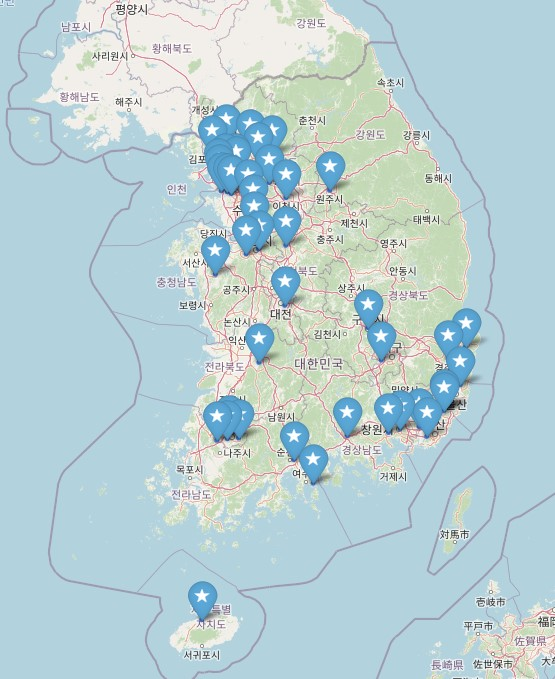

* 위 시각화는 현재 우리나라의 외국인노동자 복지시설 위치정보를 나타낸 지도, **복지시설이 수도권과 남쪽에 쏠려있고 강원도와 경상북도 지역에는 복지시설이 없는것으로 파악됨** 
*이주노동자들을 위한 복지시설이 현저히 부족한 상황이고 이는 어떤 이주노동자는 어떠한 복지서비스도 받지 못하고 있는 것을 의미함, 즉 이주노동자들은 적극적인 복지 서비스를 제공받고 있는 상황이라고 유추할 수 있음


# **Ⅵ 이주노동자 정책 현황과 실제**

**이주노동자 주거 정책**

근로기준법 시행령
[시행 2021. 11. 19.] 

> 제55조(기숙사의 구조와 설비) 사용자는 기숙사를 설치하는 경우 법 제100조에 따라 기숙사의 구조와 설비에 관하여 다음 각 호의 기준을 모두 충족해야 한다.

1. 침실 하나에 8명 이하의 인원이 거주할 수 있는 구조일 것

2. 화장실과 세면ㆍ목욕시설을 적절하게 갖출 것

3. 채광과 환기를 위한 적절한 설비 등을 갖출 것

4. 적절한 냉ㆍ난방 설비 또는 기구를 갖출 것

5. 화재 예방 및 화재 발생 시 안전조치를 위한 설비 또는 장치를 갖출 것



>  제56조(기숙사의 설치 장소) 사용자는 소음이나 진동이 심한 장소, 산사태나 눈사태 등 자연재해의 우려가 현저한 장소, 습기가 많거나 침수의 위험이 있는 장소, 오물이나 폐기물로 인한 오염의 우려가 현저한 장소 등 근로자의 안전하고 쾌적한 거주가 어려운 환경의 장소에 기숙사를 설치해서는 안 된다.


>  제57조(기숙사의 주거 환경 조성) 사용자는 기숙사를 운영하는 경우 법 제100조에 따라 기숙사의 주거 환경 조성에 관하여 다음 각 호의 기준을 충족해야 한다.

1. 남성과 여성이 기숙사의 같은 방에 거주하지 않도록 할 것

2. 작업 시간대가 다른 근로자들이 같은 침실에 거주하지 않도록 할 것. 다만, 근로자들의 작업 시간대가 다르더라도 근로자들의 수면 시간대가 완전히 구분되는 등 수면에 방해가 되지 않는 경우에는 같은 침실에 거주하도록 할 수 있다.

3. 기숙사에 기숙하는 근로자가 「감염병의 예방 및 관리에 관한 법률」 제2조제1호에 따른 감염병에 걸린 경우에는 다음 각 목의 장소 또는 물건에 대하여 소독 등 필요한 조치를 취할 것

> 제58조(기숙사의 면적) 기숙사 침실의 넓이는 1인당 2.5제곱미터 이상으로 한다.

> 제58조의2(근로자의 사생활 보호 등) 사용자는 기숙사에 기숙하는 근로자의 사생활 보호 등을 위하여 다음 각 호의 사항을 준수해야 한다.

1. 기숙사의 침실, 화장실 및 목욕시설 등에 적절한 잠금장치를 설치할 것

2. 근로자의 개인용품을 정돈하여 두기 위한 적절한 수납공간을 갖출 것

(출처: 국가법령정보센터)

**이주노동자 주거 실태**

비전문취업 이주노동자의 경우 직장 내 기숙사 형태와 같은 무상 주거의 비율이 43.5%로 가장 많았으며, 월세(사글세: 월세를 주고 빌려 쓰는 방  포함) 형태가 40% 정도를 차지했다. (중략) 여기서 **주목할 점은 무상으로 제공되는 회사 기숙사의 주거환경의 열악함이다.** 이주와 인권 연구소의 '주거환경 실태조사' 결과에 따르면 전체의 55.4%가 공장 작업장 내에 주거공간이 있거나 가건물을 기숙사로 사용 중인 것으로 파악되었다 (이주와 인권연구소, 2019). 이 가운데  **17.1%는 컨테이너 등 가건물에 거주**하는 것으로 확인되었으며, 농어촌 이주노동자들의 사정은 더 열악한 것으로 조사되었다. **기본적인 냉난방조차 갖추어지지 않은 비닐하우스에서 6~8명이 한 공간에 거주**··· (논문 中) 

**시사점**
* 외국인근로자의 고용 등에 관한 법률 및 근로기준법 시행령에 따라 기숙사 설비 정책이 마련되어 있지만, 조사 결과 이주노동자의 열악한 주거 환경이 드러남
*  **주거환경에 대한 검증 법령이 체계적으로 마련되어야 할 것으로 보임**



# **결론**

**한계점**
* 전반적으로 주제와 완전히 부합하는 통계 자료 부족
* 이주노동자의 세부 사항이 기타항목으로 통합되어 제시된 경우 多
(ex.우리나라의 외국인 비자가 총 30여 개인 것에 비해 통계 자료의 비자 종류
는 6개로 매우 한정적)
* 이주노동자의 환경을 거시적으로 분석하는데 있어 그 분야가 매우 다양하기 때문에 가장 중요하다고 느낀 일부 분야만을 추려야 했음

**시사점**